# **Analysis on the body signs of smoking**


---

#### This project was made as a part of my Data Analytics course in my college. I will be using various python modules to analyze my dataset and find an appropriate way to represent correlation. I will also be going through a few models to find the best model to predict whether a person is a smoker or not based on there body signs. A few references are added at the end of the project.

In [63]:
import pandas as pd
import warnings,math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics,feature_selection

#### Let us start our data analysis by importing our dataset.

In [43]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    df=pd.read_csv("smoking.csv")
    df.fillna(df.mean())
    print(df.head())

   ID gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0   0      F   40         155          60       81.3             1.2   
1   1      F   40         160          60       81.0             0.8   
2   2      M   55         170          60       80.0             0.8   
3   3      M   40         165          70       88.0             1.5   
4   4      F   40         155          60       86.0             1.0   

   eyesight(right)  hearing(left)  hearing(right)  ...  hemoglobin  \
0              1.0            1.0             1.0  ...        12.9   
1              0.6            1.0             1.0  ...        12.7   
2              0.8            1.0             1.0  ...        15.8   
3              1.5            1.0             1.0  ...        14.7   
4              1.0            1.0             1.0  ...        12.5   

   Urine protein  serum creatinine   AST   ALT   Gtp  oral  dental caries  \
0            1.0               0.7  18.0  19.0  27.0     Y           

In [44]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for i in df.iloc[:,2:22].columns.values.tolist():
        p=df['smoking'].corr(df[i])
        if p>0:
            print(i,p)

height(cm) 0.3966752696461977
weight(kg) 0.302779959603143
waist(cm) 0.22625929258046928
eyesight(left) 0.06120358781740864
eyesight(right) 0.0630167676139074
systolic 0.07310939993218216
relaxation 0.10830938071357173
fasting blood sugar 0.10027857561464451
triglyceride 0.2517990470800893
hemoglobin 0.4006775900723891
Urine protein 0.014267192015654406
serum creatinine 0.21681218989725576
AST 0.05925321019953099
ALT 0.0973379745902593


#### based on these correlation values we will remove all the columns which have negative correlation

In [45]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    df=df.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,14,17,18,19,20,21,23,24,25,26]]
    print(df.columns.values.tolist())

['gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic', 'relaxation', 'fasting blood sugar', 'triglyceride', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST', 'ALT', 'oral', 'dental caries', 'tartar', 'smoking']


#### I started by filling in the NA values with mean values.Let us start by analyzing our dataset. Let us see the age distribution in our dataset.

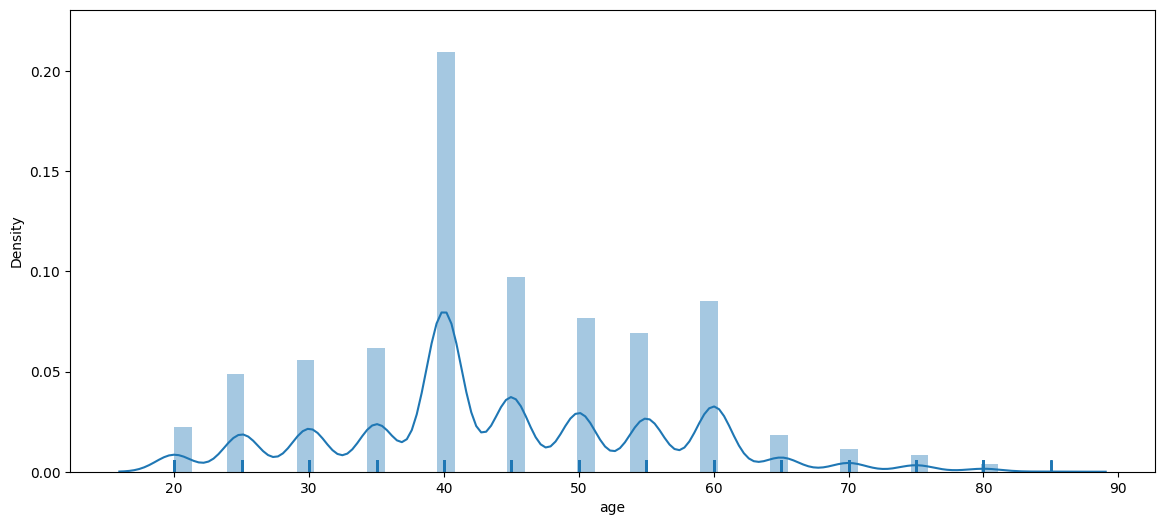

In [46]:
fig,ax=plt.subplots(figsize=(14,6))
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    ax = sns.distplot(df['age'], rug=True,ax = ax)
plt.show()

#### As we can see above our dataset has a majority of people aged 40 to 60 years. After this we no longer need age so we will remove it. Let us look into the oral column. It if fully true so we will be removing it. let us look at the hearing columns.

(55692, 22)
(55692, 20)


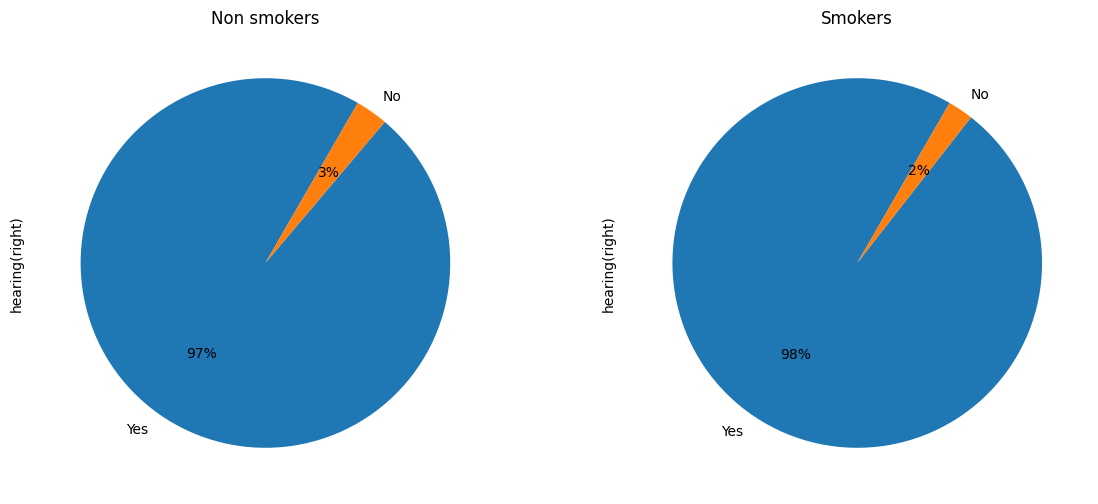

In [47]:
print(df.shape)
df.drop(['oral','age'], axis=1, inplace=True)
print(df.shape)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
a1,a2 = df[df['smoking']==0],df[df['smoking']==1]
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(14,6))

ax2 = a2['hearing(right)'].value_counts().plot.pie(autopct = "%1.0f%%",labels = ["Yes","No"],startangle = 60,ax = ax2)
ax2.set(title="Smokers")

ax1 = a1['hearing(right)'].value_counts().plot.pie(autopct = "%1.0f%%",labels = ["Yes","No"],startangle = 60,ax = ax1)
ax1.set(title="Non smokers")
plt.show()


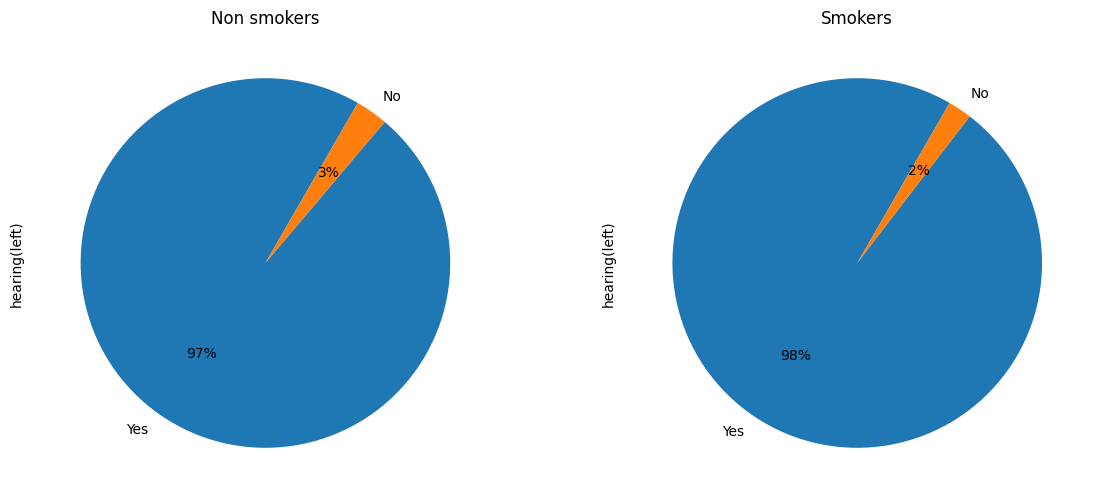

In [48]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
a1,a2 = df[df['smoking']==0],df[df['smoking']==1]
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(14,6))

ax2 = a2['hearing(left)'].value_counts().plot.pie(autopct = "%1.0f%%",labels = ["Yes","No"],startangle = 60,ax = ax2)
ax2.set(title="Smokers")

ax1 = a1['hearing(left)'].value_counts().plot.pie(autopct = "%1.0f%%",labels = ["Yes","No"],startangle = 60,ax = ax1)
ax1.set(title="Non smokers")
plt.show()

#### Since they are both irrelevant to the actual attribute of smoking, especially in our age demographic, let us remove these columns.Let us consider looking into the dental caries.

(55692, 20)
(55692, 18)


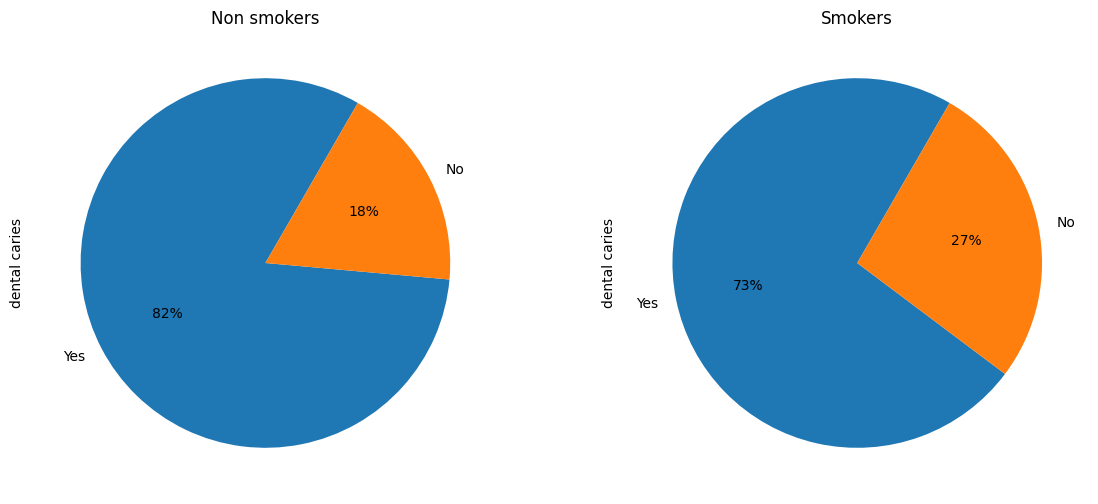

In [49]:
print(df.shape)
df.drop(['hearing(left)','hearing(right)'], axis=1, inplace=True)
print(df.shape)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
a1,a2 = df[df['smoking']==0],df[df['smoking']==1]
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(14,6))

ax2 = a2['dental caries'].value_counts().plot.pie(autopct = "%1.0f%%",labels = ["Yes","No"],startangle = 60,ax = ax2)
ax2.set(title="Smokers")

ax1 = a1['dental caries'].value_counts().plot.pie(autopct = "%1.0f%%",labels = ["Yes","No"],startangle = 60,ax = ax1)
ax1.set(title="Non smokers")
plt.show()


#### Since we are working with an older demographic, most of the test subjects have dental caries, regardless of whether they smoke or not, Hence we will drop that column. 

In [50]:
print(df.shape)
df.drop(['dental caries'], axis=1, inplace=True)
print(df.shape)

(55692, 18)
(55692, 17)


#### Let us analyse the contribution of tartar in the dataset.

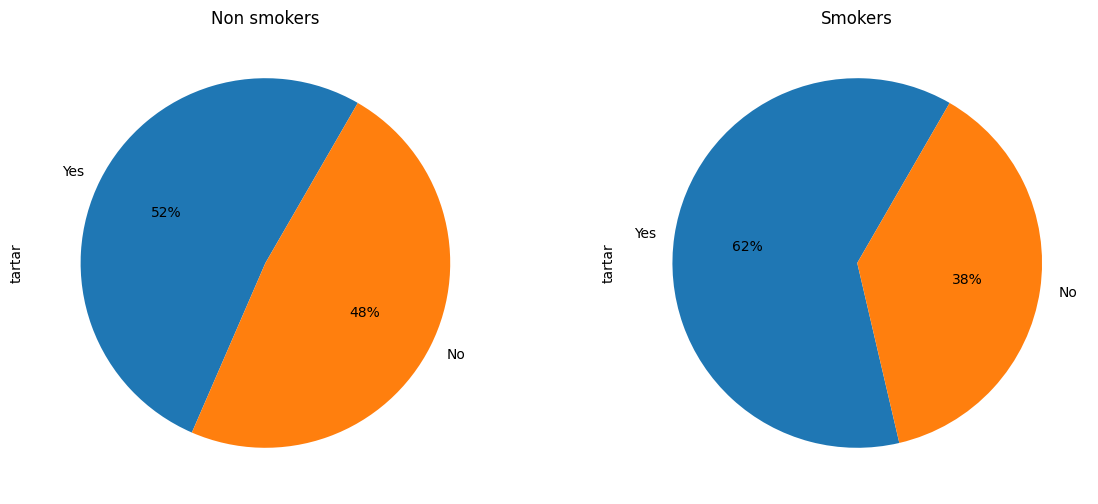

In [51]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
a1,a2 = df[df['smoking']==0],df[df['smoking']==1]
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(14,6))

ax2 = a2['tartar'].value_counts().plot.pie(autopct = "%1.0f%%",labels = ["Yes","No"],startangle = 60,ax = ax2)
ax2.set(title="Smokers")

ax1 = a1['tartar'].value_counts().plot.pie(autopct = "%1.0f%%",labels = ["Yes","No"],startangle = 60,ax = ax1)
ax1.set(title="Non smokers")
plt.show()


#### Tartar is again an irrelevant factor in the prediciton due our demographic and hence we will be removing tartar. Now let us consider the gender distribution in our dataset.Moving on we will visualize the division of smokers and non smokers based on gender.

(55692, 17)
(55692, 16)


[Text(0.5, 1.0, 'Non-smokers')]

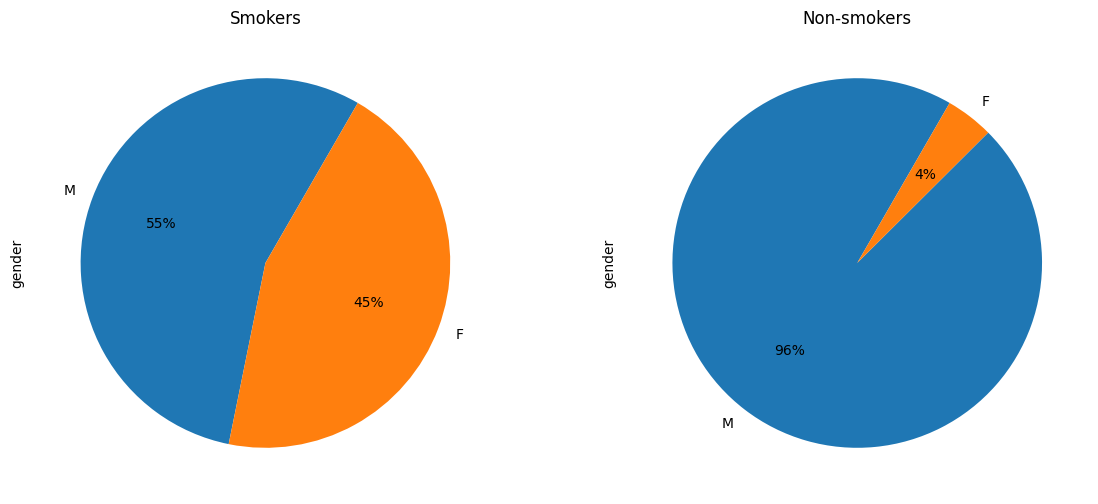

In [52]:
print(df.shape)
df.drop(['tartar'], axis=1, inplace=True)
print(df.shape)

fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(14,6))
ax1 = a1['gender'].value_counts().plot.pie(autopct = "%1.0f%%",labels = ["M","F"],startangle = 60,ax=ax1)
ax1.set(title = "Smokers")
ax2 = a2['gender'].value_counts().plot.pie(autopct = "%1.0f%%",labels = ["M","F"],startangle = 60)
ax2.set(title = "Non-smokers")

#### With the EDA out of the way let us begin with the prediction. Moving into standarization, let us start by splitting the dataset into X and Y and then label encoding the text values in X, namely the oral, tartar and gender columns. We will then scale our data using standard scaler.The Standard Scaler helps to get standardized distribution, with a zero mean and standard deviation of one (unit variance). It standardizes features by subtracting the mean value from the feature and then dividing the result by feature standard deviation. 

#### Standardized value = (row_value - mean) /(standard_deviation)

[Click here for Reference](https://www.geeksforgeeks.org/data-pre-processing-wit-sklearn-using-standard-and-minmax-scaler/#:~:text=Standard%20Scaler%20helps%20to%20get%20standardized%20distribution%2C%20with,then%20dividing%20the%20result%20by%20feature%20standard%20deviation.)

In [55]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    X=df.iloc[:,[i for i in range(15)]]
    X.to_csv("test.csv")
    Y=df.iloc[:,[15]]
    X[["gender"]]=X[["gender"]].apply(LabelEncoder().fit_transform)
    s=StandardScaler().fit(X)
    X= s.transform(X)

#### With our processed X and Y files let us now split it into train and test sets. The test size was decided to be 30% for training.

In [56]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size= 0.30,random_state = 0,stratify=Y)

#### The first model we will be implementing will be linear regression. It is a basic regressor algorithm which will use all columns as weights.

In [57]:
LRM=LinearRegression()
LRM.fit(X_train,y_train)
prediction=LRM.predict(X_test)
print("RMSE:",math.sqrt(metrics.mean_squared_error(y_test, prediction)))

RMSE: 0.40768136249839004


#### We are getting an accuracy of around 0.4 for linear regression, this is pretty good. Moving on we will see this is the best accuracy we will get from all models. Now we move on to the decision tree classifier.

In [58]:
CART = DecisionTreeClassifier()
CART.fit(X_train, y_train)
prediction=CART.predict(X_test)
print("RMSE:",math.sqrt(metrics.mean_squared_error(y_test, prediction)))


RMSE: 0.48953618734142873


#### The RMSE on the decision tree classifier is around 0.48. Not as good as the linear regressor. Moving on to the random forest classifier.

In [59]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    RFC = RandomForestClassifier(n_estimators=50) #Estimators refer to number of trees used in the forest
    RFC.fit(X_train, y_train)
    prediction=RFC.predict(X_test)
    print("RMSE:",math.sqrt(metrics.mean_squared_error(y_test, prediction)))


RMSE: 0.44804258664169133


#### The RMSE value for random tree classifier is around 0.44, while better than decision tree classifier, it is still not as good as the linear regressor. Moving onto the k nearest neighbours classifier.

In [60]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    KNC = KNeighborsClassifier()
    KNC.fit(X_train, y_train)
    prediction=KNC.predict(X_test)
    print("RMSE:",math.sqrt(metrics.mean_squared_error(y_test, prediction)))


RMSE: 0.5274372840256183


#### The RMSE value for the k nearest neighbours classifier is around 0.52 and hence it is technically the worst model we have tried out so far. The final model we will try is the support vector classifier.

In [61]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    S=SVC()
    S.fit(X_train,y_train)
    prediction=S.predict(X_test)
    print("RMSE:",math.sqrt(metrics.mean_squared_error(y_test, prediction)))

RMSE: 0.519893913784012


#### The RMSE for SVC is around 0.51, hence it one of the worse models we have implemented. moving onto logistic regression.



In [64]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    lo=LogisticRegression()
    lo.fit(X_train,y_train)
    prediction=lo.predict(X_test)
    print("RMSE:",math.sqrt(metrics.mean_squared_error(y_test, prediction)))

RMSE: 0.5244786049387948


#### it gave an RMSE of 0.52 and hence is on par with the worst model we have so far. The best model so far is linear regression and hence we will use that for prediction.

---


## References


#### [What is linear regression?](https://www.geeksforgeeks.org/ml-linear-regression/)
#### [What is a decision tree classifier?](https://towardsdatascience.com/decision-tree-classifier-explained-in-real-life-picking-a-vacation-destination-6226b2b60575)
#### [What is random forest classifier?](https://machinelearn.in/blogs/random-forest-classifier-in-machine-learning/)
#### [What is KNN?](https://www.geeksforgeeks.org/k-nearest-neighbours/)
#### [What is SVM?](https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47)

---

# Thank You!